<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.859 - Visualización de datos aula 2</p>
<p style="margin: 0; text-align:right;">20221 - Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Mikel Urrutxi Sagasta
</div>

# A9: Creación de la visualización (Práctica II)

Descripción y enunciado
En esta segunda parte de la práctica, el estudiante tendrá que desarrollar una visualización de datos que demuestre su conocimiento del campo, así como el uso de diferentes herramientas y técnicas, basadas en el conjunto de datos seleccionado y validado en la primera parte de la práctica.

Esta práctica tiene como finalidad los siguientes objetivos:

Utilizar herramientas diversas y avanzadas para la creación de visualizaciones.
Crear un proyecto de visualización de datos con una estructura, diseño y contenido de calidad profesional.
Practicar diversos tipos de enfoques respecto a las preguntas clave a responder.
Comprender los elementos de interactividad que aportan valor a una visualización.
Aparte de la visualización, el estudiante tendrá que entregar un video que describa los siguientes aspectos de la misma:

- [20%] Proceso de creación y diseño: El proceso de creación seguido y las decisiones de diseño que se han tomado a lo largo del desarrollo (colores, uso de texto, … ).

- [20%] Visualización: La presentación in situ de la visualización, es decir, comentar sobre las características de la visualización mientras se navega.

- [15%] Datos: descripción técnica, relevancia del conjunto de datos en su contexto y complejidad (medida, variables disponibles, tipos de datos, …), comentando los datos que se muestran en la visualización.

- [20%] Contenidos: ¿qué preguntas responde la visualización de datos?

- [15%] Interacción: el listado de elementos interactivos que incluye la visualización.

- [10%] Reflexión: ¿qué he aprendido del conjunto de datos? ¿qué he aprendido de las técnicas utilizadas? ¿qué me hubiera gustado hacer y no he podido?

El video debe durar entre 4 y 6 minutos. Es importante respetar este rango de tiempo, ya que también se evalúa la capacidad de síntesis y la calidad del guión.

El código debe publicarse en un repositorio público, como Gitlab o GitHub, con una licencia de código abierto. Debe incluir todos los archivos necesarios para ejecutar, eventualmente, la aplicación en un servidor web local. La URL de la pantalla inicial de la visualización debe ser pública y debe poder ser explorada sin iniciar sesión. Podéis usar, por ejemplo, GitHub Pages (https://pages.github.com/), Surge.sh o subir vuestra aplicación a un espacio web accesible públicamente. En el caso de Tableau, se puede publicar en Tableau Public, o igualmente en otras herramientas en línea (Observable, Infogram, Flourish, ...).

## Predicción de clientes de tarjetas de crédito

Desde hace mucho me interesan temas relacionados con la economía y la banca, es por eso por lo que he seleccionado este conjunto de datos. En este caso, últimamente las entidades bancarias se enfrentan al abandono de clientes en carteras de tarjetas de créditos, ya que algunos clientes se aprovechan de abrir tarjetas con el único propósito de obtener bonificaciones de bienvenida u otras ventajas. Después de que la bonificación aparezca en la cuenta y antes de que se cobre la siguiente cuota anual estos clientes cierran la tarjeta.

Este conjunto de datos se encuentra en la página web de Kaggle, esta una plataforma comunitaria en línea para científicos de datos y entusiastas del aprendizaje automático. Podemos asumir que la fuente de datos es fiable y que está libre de errores metodológicos durante su captura y procesamiento.

En este caso, las tarjetas de crédito al consumo se enfrentan al problema del abandono de clientes. Quieren analizar los datos para averiguar el motivo y aprovecharlos para predecir los clientes susceptibles de darse de baja. Este problema esta enfocado a entidades bancarias, ya que quieren evitar perdida de sus clientes.

En la visualización de datos se van a responder a las preguntas, como que características tienen los clientes que suelen abandonar las tarjetas de créditos o porque podrían dejar los clientes usar las tarjetas de crédito. Está dataset tiene todos los datos necesarios para responder las preguntas que se han planteado.

In [12]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Lectura del archivo
df = pd.read_csv('BankChurners.csv', low_memory=False)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Definición de las características:

- CLIENTNUM: Número de cliente. Identificador único del cliente titular de la cuenta
- Attrition_Flag: Variable de evento interno (actividad del cliente) - si la cuenta se cierra, entonces 1, en caso contrario 0
- Customer_Age: variable demográfica - edad del cliente en años
- Gender: Variable demográfica - M=Hombre, F=Mujer
- Dependent_count: Variable demográfica - Número de personas a cargo
- Education_level: Variable demográfica - Cualificación educativa del titular de la cuenta (ejemplo: bachillerato, licenciatura, etc.)
- Marital_status: Variable demográfica - Casado, soltero, divorciado, desconocido
- Income_category: Variable demográfica: categoría de ingresos anuales en dolares del titular de la cuenta (< 40 000, entre 40 000 y 60 000, entre 60 000 y 80 000, entre 80 000 y 120 000, > 120 000, desconocida).
- Card_Category: Variable de producto - Tipo de tarjeta (Azul, Plata, Oro, Platino)
- Months_on_book: Periodo de relación con el banco
- Total_Relationship_Count: Nº total de productos que posee el cliente
- Months_Inactive_12_mon: Nº de meses inactivo en los últimos 12 meses
- Contacts_Count_12_mon: Nº de contactos en los últimos 12 meses
- Credit_Limit: Límite de crédito de la tarjeta de crédito
- Total_Revolving_Bal: Saldo Rotativo Total de la Tarjeta de Crédito
- Avg_Open_To_Buy: Línea de crédito abierta a la compra (media de los últimos 12 meses)
- Total_Amt_Chng_Q4_Q1: Cambio en el importe de las transacciones (4T sobre 1T)
- Total_Trans_Amt: Importe total de las transacciones (últimos 12 meses)
- Total_Trans_Ct: Total de transacciones (últimos 12 meses)
- Total_Ct_Chng_Q4_Q1: Cambio en el número de transacciones (4T sobre 1T)
- Avg_Utilization_Ratio: Índice medio de utilización de tarjetas
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: Naive Bayes
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: Naive Bayes

Fuente: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

### Borrar funciones inútiles:
Hay algunas características de la tabla de datos que no aportan en el análisis que se quiere hacer en esta práctica. Las variables son las siguientes:
- CLIENTNUM: número de identificación del cliente
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 : Naive Bayes de otro modelo de aprendizaje automático
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 : Naive Bayes de otro modelo de aprendizaje automático


In [14]:
useless = ['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
dfDrop = df.drop(useless, axis=1)

## Análisis y visualización de los datos

Primero, se han visualizado la variables para ver si se podría sacar alguna conclusión. Principalmente, los datos se han visualizado en gráficas de barras, también se ha visualizado algunas características de los datos como la media, la desviación estándar, los valores minimos y máximos, etc. Las variables númericas se han representado con gráfico combinado, también se conocen como gráficos de líneas y columnas (barras), porque combinan un gráfico de líneas con un gráfico de barras. Las variables categóricas se han representado solo en gráficos de barras.

In [15]:
# Variables númericas
dfDrop.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


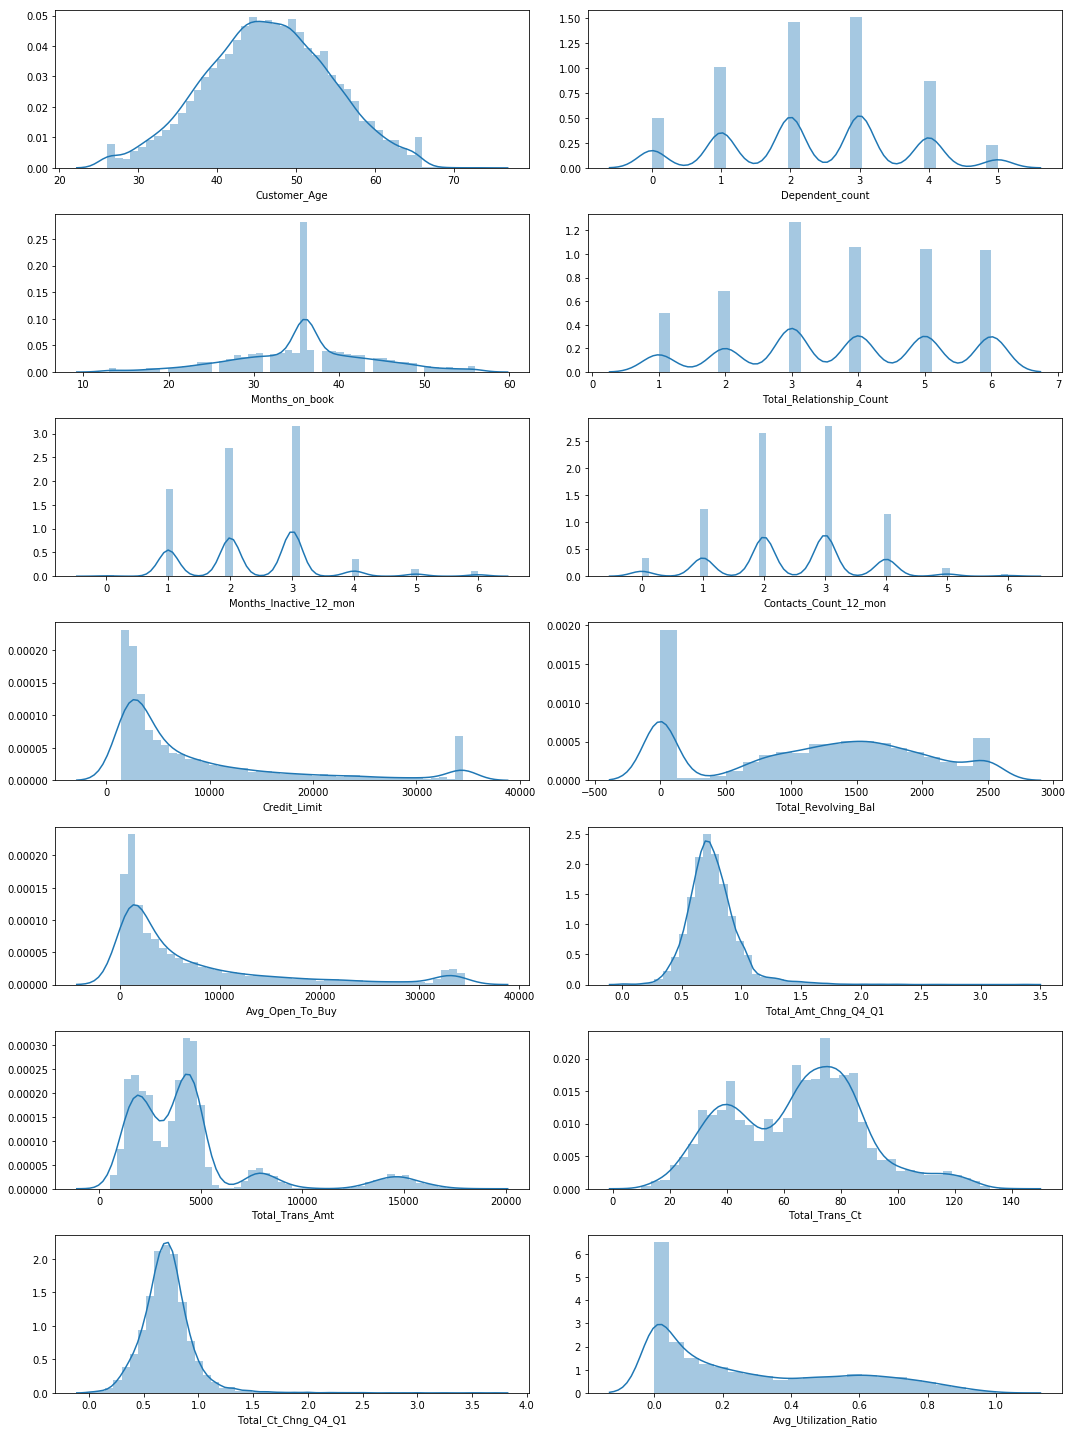

In [16]:
num = list(dfDrop.describe().columns)
plt.figure(figsize=(15, 20))
for i in range(0, len(num)):
    plt.subplot(7, 2, i+1)
    sns.distplot(dfDrop[num[i]])
    plt.xlabel(num[i])
    plt.tight_layout()

En un primer análisis se puede ver que la media de edad de los clientes (Customer_age) ronda los 46 años, es decir, la mayoria de los clientes tiene entre cuarenta y cincuenta años. Estos clientes tienen a cargo (Dependent_count)suyo dos o tres personas, lo que quiere decir que son gente con familia. La gran mayoría de los clientes tiene una relación con el banco durante tres años. También se puede ver que la mayoría de la gente tiene una media de 5000 dolares de limite de crédito (Credit_limit), pero hay un pequeño grupo de clientes que tiene como limite 35000 dolares. En un año los clientes suelen hacer 65 transacciones (Total_Trans_Ct) con un total 4000 dolares en transacciones (Total_Trans_Amt), esto significa que cada transacción con la tarjeta de crédito se han sacado 62 dolares.

In [17]:
# Variables categóricas
dfDrop.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


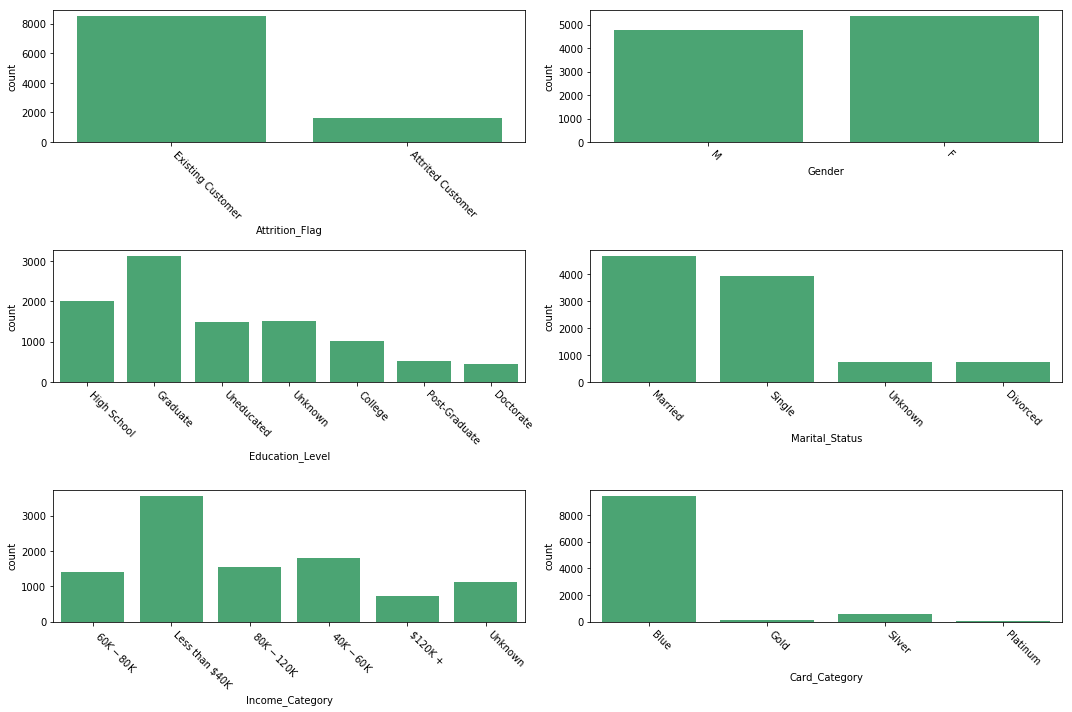

In [18]:
cat = list(dfDrop.describe(include='object').columns)
plt.figure(figsize=(15,10))
for i in range(0, len(cat)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = dfDrop[cat[i]], color='mediumseagreen', orient='v')
    plt.xticks(rotation=-45, ha='left')
    plt.tight_layout()

Después de analizar las variables categóricas se han sacado las siguientes conclusiones: Alrededor del 15% de los clientes abandona el servicio de tarjeta de crédito (Attrition_Flag). La cantidad de hombres y mujeres (Gender) es parecida. La mayoria de la gente está graduada (Education_Level) están solteros o casados (Marital_status). La mayoría de gente tiene la tarjeta de la categoria (Card_Category) azul (Blue) y tiene ingresos menores que cuarenta mil dolares.

Viendo todas estás características el perfil más habitual de cliente es una mujer casada y graduada con la tarjeta de categoria azul con ingresos menores que cuarenta mil dolares.

Text(0.5, 1.0, 'Transaction Count vs Transaction Amount')

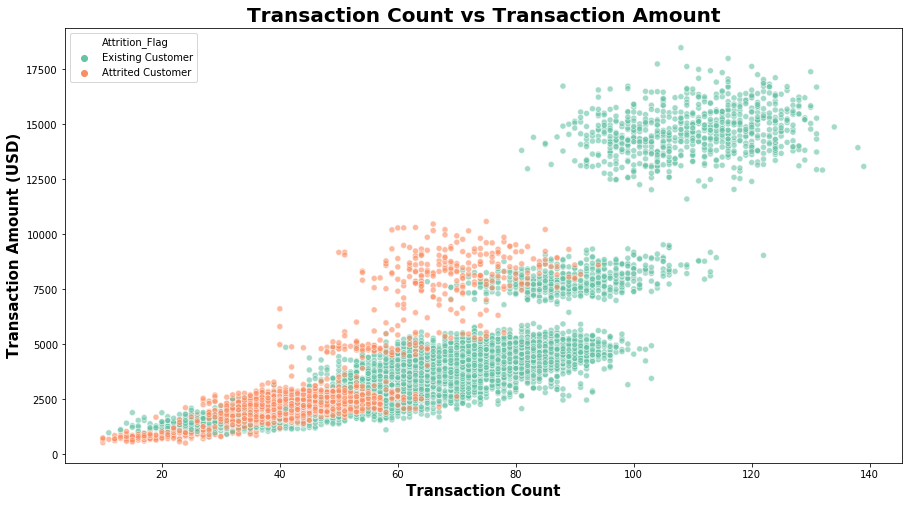

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=dfDrop, x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag', alpha=0.6, palette='Set2')
plt.xlabel('Transaction Count', size=15, weight='bold')
plt.ylabel('Transaction Amount (USD)', size=15, weight='bold')
plt.title('Transaction Count vs Transaction Amount', size=20, weight='bold')

Para analizar porqué la gente abandona los servicios del uso de tarjetas de crédito se han ido analizando las diferentes variables. Primero, se ha decidido analizar las variables *Transaction Count* (Total_Trans_Ct) y *Transaction Amount* (Total_Trans_Amt), ya que tienen relación directa entre ellas. En el gráfico se puede ver que los clientes que dejan de usar los servicios del banco suelen hacer pocas transacciones y de poca cantidad de dinero. Por el contrario, los clientes existentes realizan muchas más transacciones y de más valor.

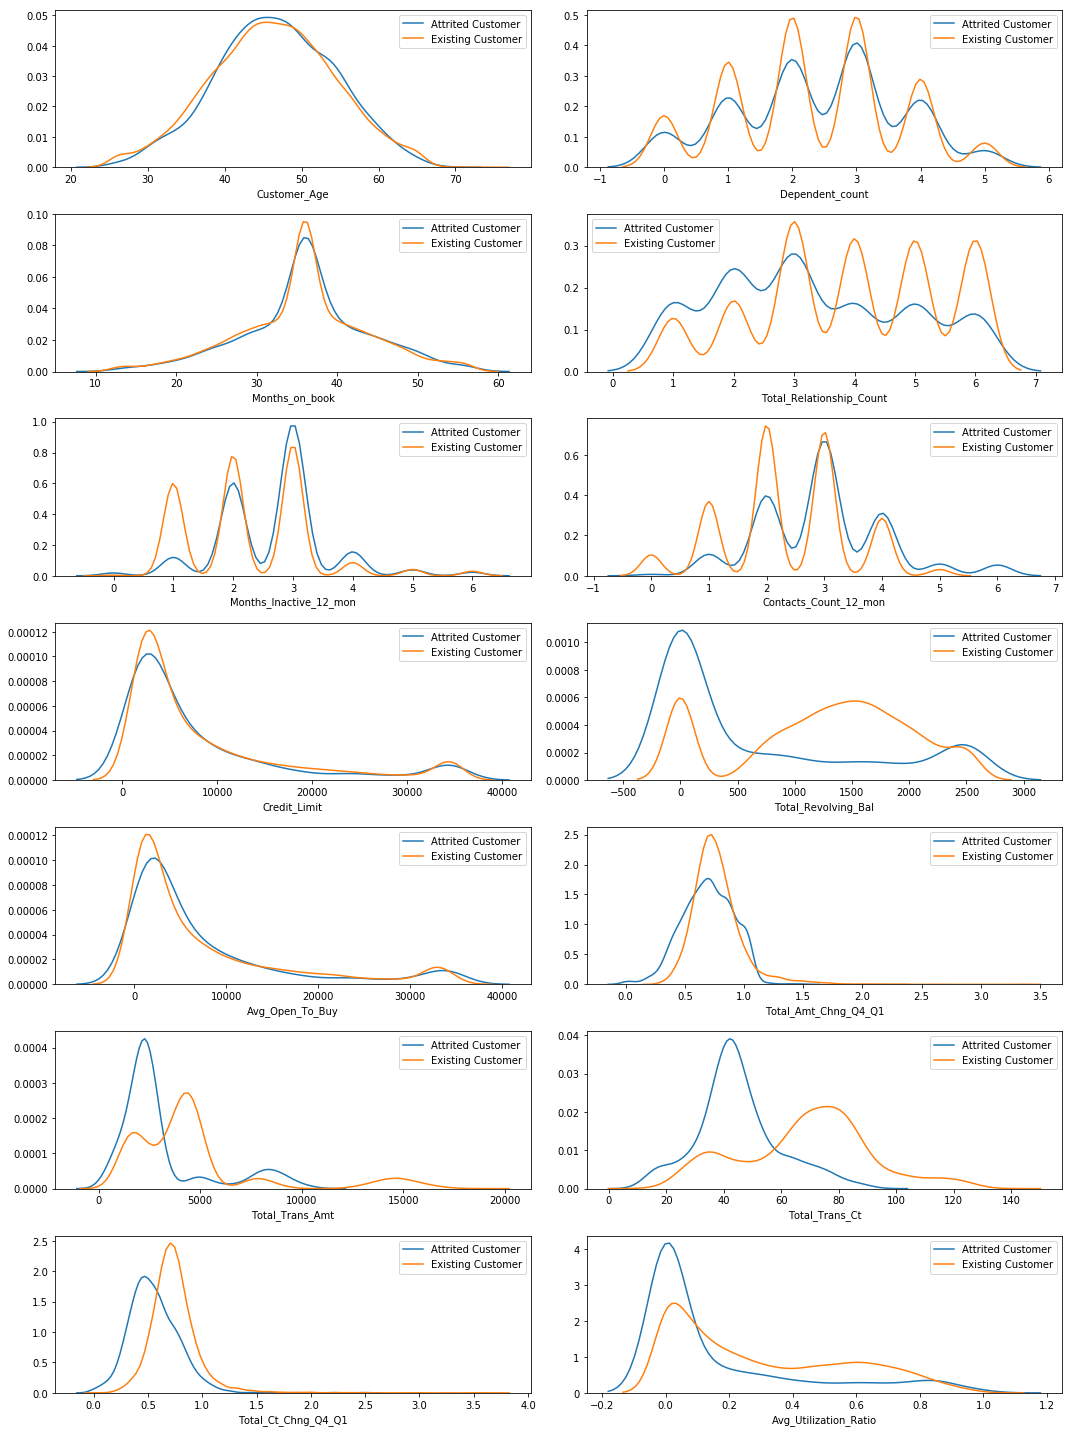

In [20]:
num = list(dfDrop.describe().columns)
dfAttrited = dfDrop.loc[dfDrop.Attrition_Flag == "Attrited Customer"]
dfExisting = dfDrop.loc[dfDrop.Attrition_Flag == "Existing Customer"]
plt.figure(figsize=(15, 20))
for i in range(0, len(num)):
    plt.subplot(7, 2, i+1)
    sns.kdeplot(data=dfAttrited[num[i]], legend=True)
    sns.kdeplot(data=dfExisting[num[i]], legend=True)
    plt.legend(labels=['Attrited Customer', 'Existing Customer'])
    plt.xlabel(num[i])
    plt.tight_layout()

Como se ha visto en la gráfica anterior los clientes que hacen menos transacciones y de menos cantidad de dinero son más propensos a dejar los servicios de las tarjetas. También, se puede ver que los abandonos pasan porque este tipo de clientes no suele pedir prestamos o no suele pagarlos, ya que tiene una deuda.

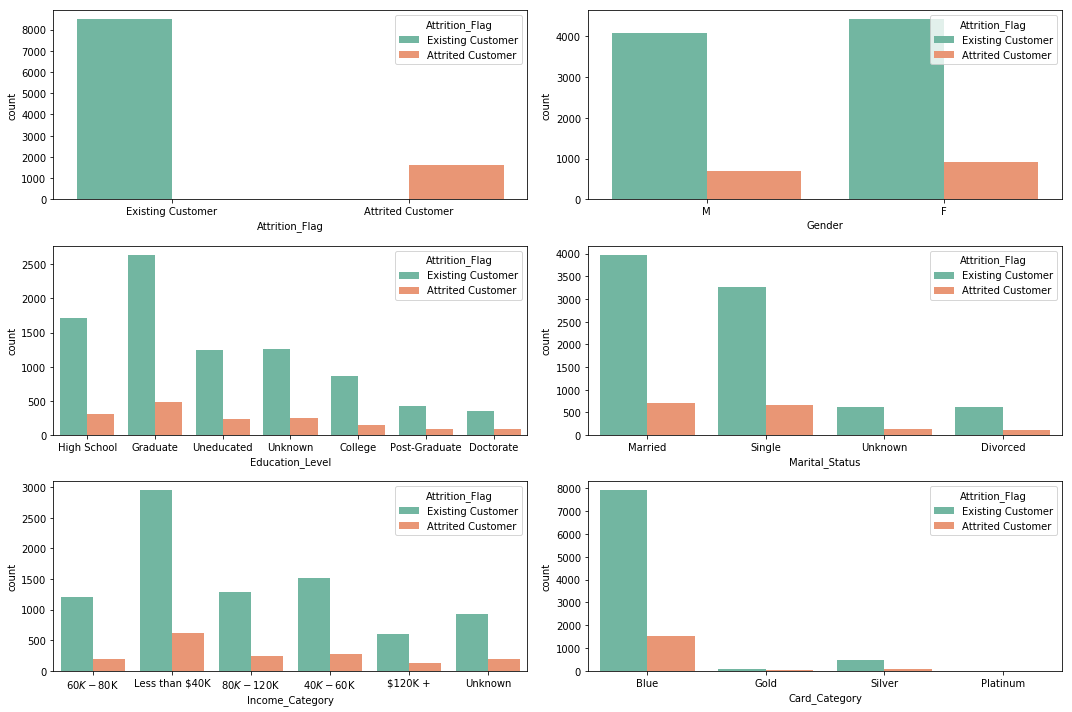

In [21]:
cat = list(dfDrop.describe(include='object').columns)
plt.figure(figsize=(15,10))
for i in range(0, len(cat)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = dfDrop[cat[i]], orient='v', hue=dfDrop['Attrition_Flag'], palette="Set2")
    plt.tight_layout()

## Conclusión
Se ha podido responder a la pregunta de porqué los clientes abandonan los servicios de esta entidad bancaria. Después de analizar profundamente los gráficos, se han sacado las siguientes conclusiones:
- Hay un 16% de clientes que han cambiado de proveedor, es decir, que han abandonado el servicio de la tarjeta de crédito.
- La proporción de hombres y mujeres está casi igualada (53% de hombres y 47% de mujeres) en comparación con la proporción de clientes existentes y atribuidos (84% y 16%), que está muy desequilibrada.
- La proporción de clientes dados de baja por género es un (14%) mayor entre los hombres que entre las mujeres.
- Los clientes que se han dado de baja tienen un alto nivel de estudios: el nivel de estudios de los clientes dados de baja es el de graduado (30%), seguido del de posgrado (19%).
- El estado civil de los clientes que se han dado de baja es casado (44%), seguido de soltero (41%), en comparación con divorciado (7%) y desconocido (8%).
- Como se puede ver en la proporción de la categoría de ingresos de los clientes dados de baja, está muy concentrada en torno a los ingresos inferiores a 40.000 dólares (38%), seguida de los ingresos de entre 60.000 y 80.000 dólares (17%) en comparación con los clientes dados de baja con ingresos anuales superiores de entre 80.000 y 120.000 dólares (15%) y más de 120.000 dólares (12%). Supongo que los clientes con ingresos más elevados no son más propensos a abandonar los servicios de tarjeta de crédito que los clientes con ingresos medios.

Resumiendo, la personas que cambian de proveedor cumplen el siguiente perfil: Un hombre con un alto nivel de estudios que está casado y con ingresos medios.